# CaliforniaHouse Price data

In [31]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settings
%matplotlib inline

## Configuration

In [2]:
csv_file = settings.APP_FOLDER / 'data' /'california-housing-prices-data-extra-features'/ 'California_Houses.csv'

In [3]:
df = pd.read_csv(csv_file)

df.shape

(20640, 14)

In [4]:
df.sample(5)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
16935,500001.0,3.4902,34,6394,1619,2400,1496,37.56,-122.33,4548.511495,536470.137431,714627.568818,45949.086011,25408.347148
13316,128900.0,2.5677,16,6009,1599,5110,1389,34.07,-117.62,57467.461625,57486.535454,156497.604760,529708.242134,597600.330691
7410,154000.0,1.7778,38,1889,565,2087,559,33.95,-118.21,19725.665174,11784.433069,168317.589451,502378.173473,570393.032625
8206,153700.0,2.4000,25,3742,1180,3916,1063,33.79,-118.16,4375.465315,30164.211444,151315.015950,518979.735304,586963.133081
13168,207900.0,3.0670,11,3701,739,1749,654,36.83,-121.40,35268.284653,420850.503147,599178.940757,71217.568154,139060.589003


## EDA

In [34]:
df.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [17]:
# pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,"206,855.82",3.87,28.64,"2,635.76",537.90,"1,425.48",499.54,35.63,-119.57,"40,509.26","269,421.98","398,164.93","349,187.55","386,688.42"
std,"115,395.62",1.90,12.59,"2,181.62",421.25,"1,132.46",382.33,2.14,2.00,"49,140.04","247,732.45","289,400.56","217,149.88","250,122.19"
min,"14,999.00",0.50,1.00,2.00,1.00,3.00,1.00,32.54,-124.35,120.68,420.59,484.92,569.45,456.14
25%,"119,600.00",2.56,18.00,"1,447.75",295.00,787.00,280.00,33.93,-121.80,"9,079.76","32,111.25","159,426.39","113,119.93","117,395.48"
50%,"179,700.00",3.53,29.00,"2,127.00",435.00,"1,166.00",409.00,34.26,-118.49,"20,522.02","173,667.46","214,739.83","459,758.88","526,546.66"
75%,"264,725.00",4.74,37.00,"3,148.00",647.00,"1,725.00",605.00,37.71,-118.01,"49,830.41","527,156.24","705,795.40","516,946.49","584,552.01"
max,"500,001.00",15.00,52.00,"39,320.00","6,445.00","35,682.00","6,082.00",41.95,-114.31,"333,804.69","1,018,260.12","1,196,919.27","836,762.68","903,627.66"


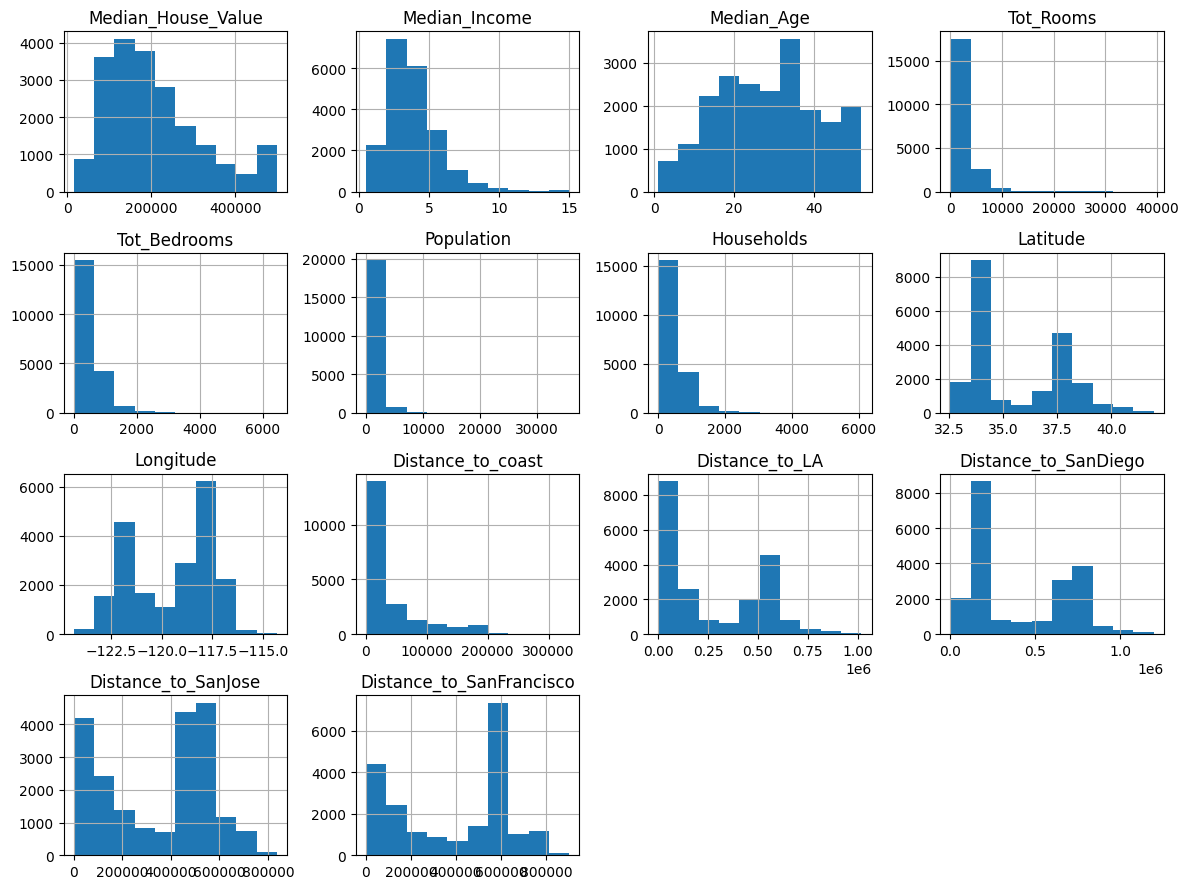

In [18]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

<Axes: >

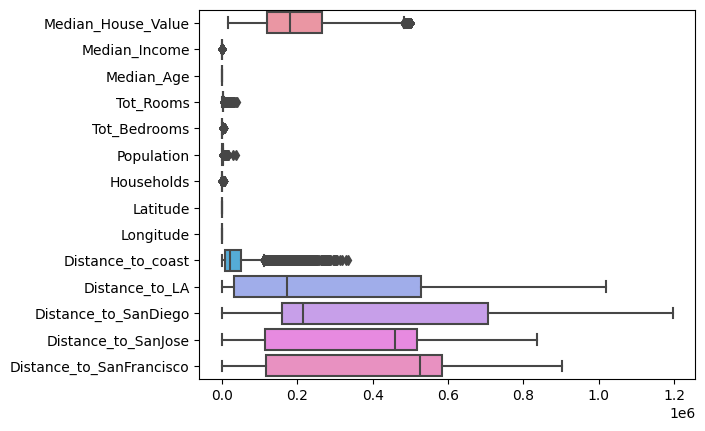

In [19]:
sns.boxplot(data=df, orient='h')

### Correlation

In [20]:
df.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.00,0.69,0.11,0.13,0.05,-0.02,0.07,-0.14,-0.05,-0.47,-0.13,-0.09,-0.04,-0.03
Median_Income,0.69,1.00,-0.12,0.20,-0.01,0.00,0.01,-0.08,-0.02,-0.24,-0.07,-0.06,-0.04,-0.02
Median_Age,0.11,-0.12,1.00,-0.36,-0.32,-0.30,-0.30,0.01,-0.11,-0.23,-0.03,0.04,-0.09,-0.10
Tot_Rooms,0.13,0.20,-0.36,1.00,0.93,0.86,0.92,-0.04,0.04,-0.00,-0.02,-0.04,0.03,0.03
Tot_Bedrooms,0.05,-0.01,-0.32,0.93,1.00,0.88,0.98,-0.07,0.07,-0.02,-0.06,-0.07,0.06,0.06
Population,-0.02,0.00,-0.30,0.86,0.88,1.00,0.91,-0.11,0.10,-0.04,-0.11,-0.11,0.08,0.09
Households,0.07,0.01,-0.30,0.92,0.98,0.91,1.00,-0.07,0.06,-0.06,-0.06,-0.07,0.05,0.05
Latitude,-0.14,-0.08,0.01,-0.04,-0.07,-0.11,-0.07,1.00,-0.92,0.30,0.94,0.99,-0.86,-0.90
Longitude,-0.05,-0.02,-0.11,0.04,0.07,0.10,0.06,-0.92,1.00,0.01,-0.89,-0.96,0.92,0.95
Distance_to_coast,-0.47,-0.24,-0.23,-0.00,-0.02,-0.04,-0.06,0.30,0.01,1.00,0.20,0.21,-0.08,-0.07


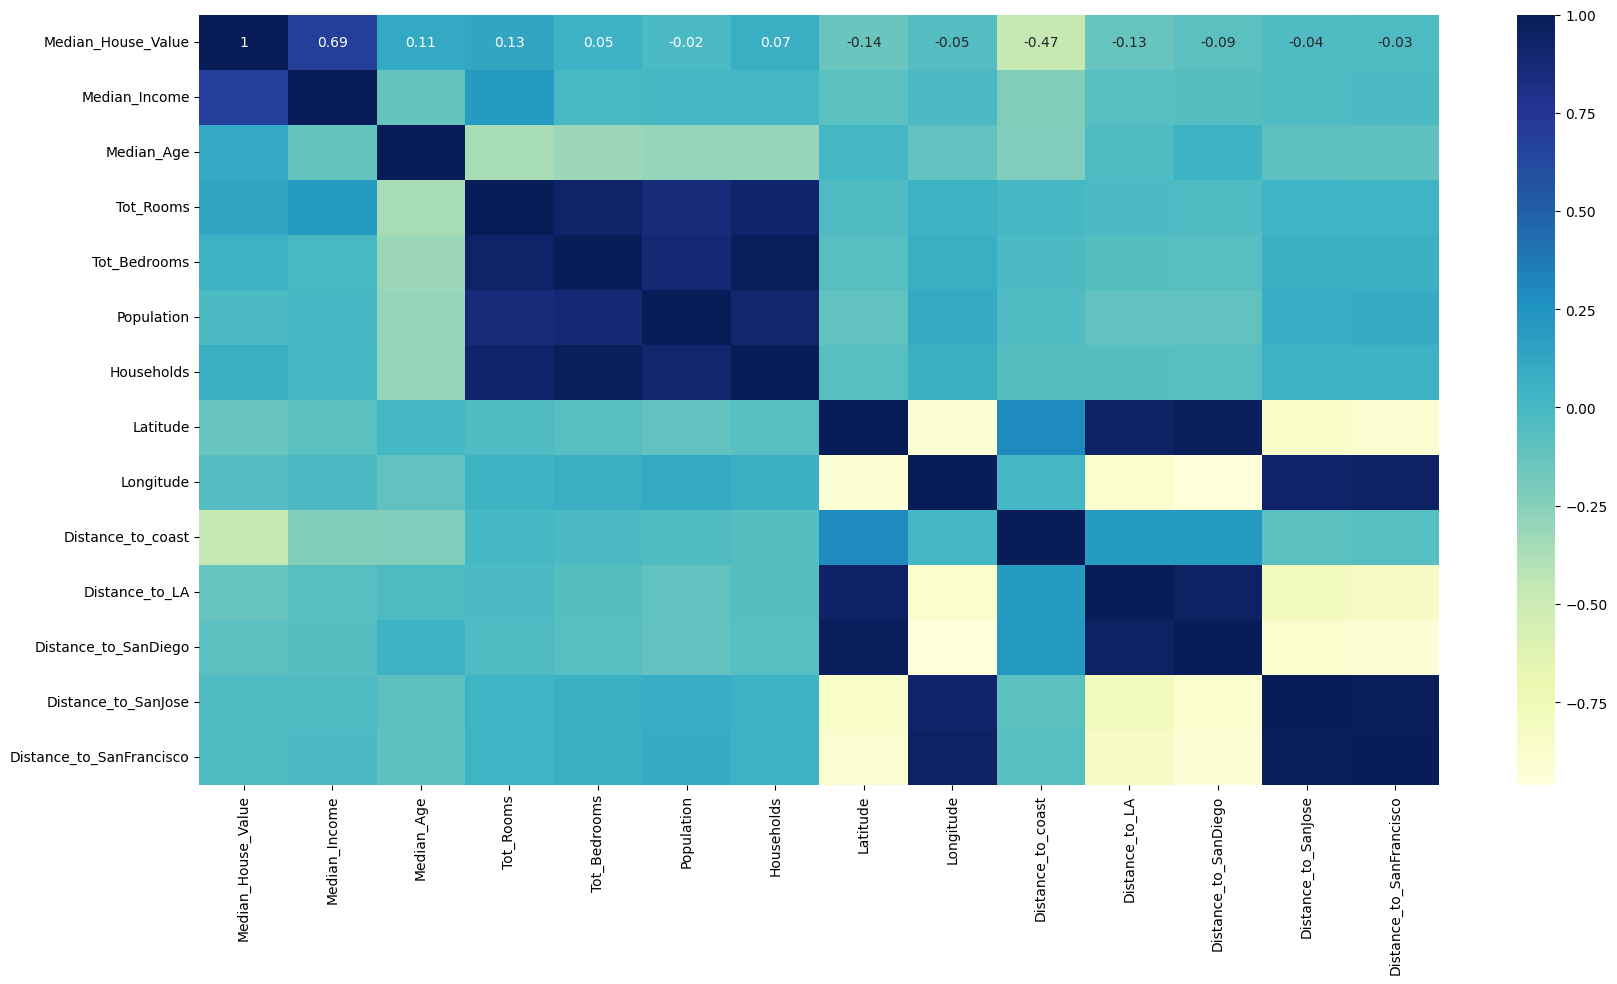

In [29]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

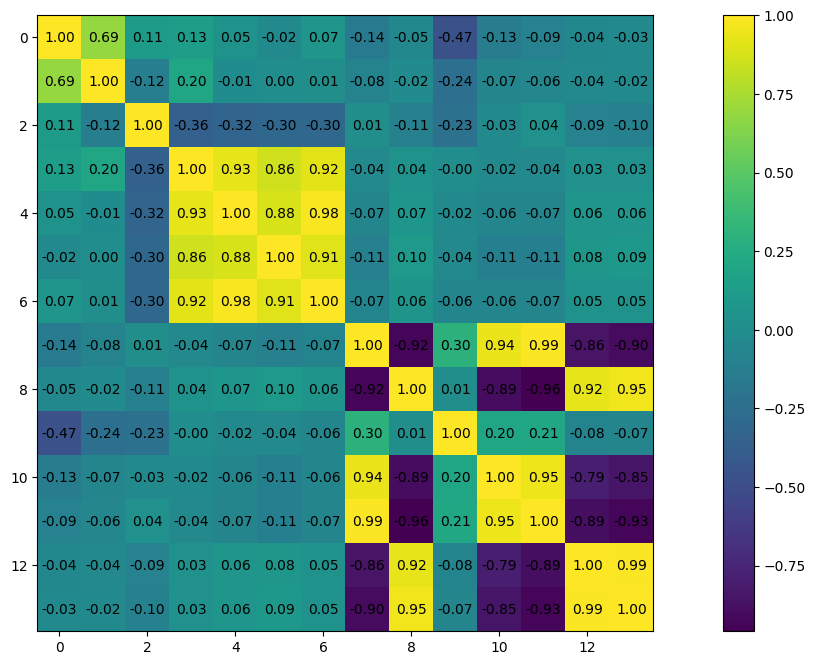

In [33]:
fig, ax = plt.subplots(figsize=(18, 8))
cax = ax.imshow(df.corr()) #, cmap='YlGnBu')
fig.colorbar(cax)
for (i, j), z in np.ndenumerate(df.corr()):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.show()

In [22]:
sns.__version__

'0.12.2'

In [23]:
pd.__version__

'2.1.1'

In [24]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.1
Seaborn   : 0.12.2
Matplotlib: 3.8.0


In [25]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


<Axes: >

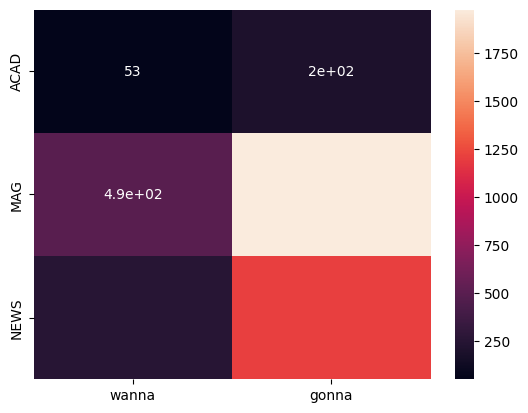

In [15]:
sns.heatmap(
    pd.DataFrame({
        'wanna': {'ACAD': 53, 'MAG': 490, 'NEWS': 249}, 
        'gonna': {'ACAD': 202, 'MAG': 1974, 'NEWS': 1207}}), 
    annot=True)